Encoding

In [1]:
from pandas import read_csv, DataFrame, concat
from dslabs_functions import get_variable_types, encode_cyclic_variables, dummify

files = [ "data/class_pos_covid.csv", "data/class_pos_covid2.csv"]
file_tag = "class_pos_covid"
data: DataFrame = concat([read_csv(file, index_col=None) for file in files], axis=0)

vars: dict[str, list] = get_variable_types(data)

yes_no: dict[str, int] = {"no": 0, "No": 0, "yes": 1, "Yes": 1}

encoding: dict[str, dict[str, int]] = {
    # One-Hot Encoding
    # "State": {'Alabama': 0, 'Alaska': 1, 'Arizona': 2, 'Arkansas': 3, 'California': 4, 'Colorado': 5, 'Connecticut': 6, 'Delaware': 7, 'District of Columbia': 8, 'Florida': 9, 'Georgia': 10, 'Guam': 11, 'Hawaii': 12, 'Idaho': 13, 'Illinois': 14, 'Indiana': 15, 'Iowa': 16, 'Kansas': 17, 'Kentucky': 18, 'Louisiana': 19, 'Maine': 20, 'Maryland': 21, 'Massachusetts': 22, 'Michigan': 23, 'Minnesota': 24, 'Mississippi': 25, 'Missouri': 26, 'Montana': 27, 'Nebraska': 28, 'Nevada': 29, 'New Hampshire': 30, 'New Jersey': 31, 'New Mexico': 32, 'New York': 33, 'North Carolina': 34, 'North Dakota': 35, 'Ohio': 36, 'Oklahoma': 37, 'Oregon': 38, 'Pennsylvania': 39, 'Puerto Rico': 40, 'Rhode Island': 41, 'South Carolina': 42, 'South Dakota': 43, 'Tennessee': 44, 'Texas': 45, 'Utah': 46, 'Vermont': 47, 'Virgin Islands': 48, 'Virginia': 49, 'Washington': 50, 'West Virginia': 51, 'Wisconsin': 52, 'Wyoming': 53},
    "Sex": {'Female': 0, 'Male': 1},
    "GeneralHealth": {'Excellent': 0, 'Fair': 1, 'Good': 2, 'Poor': 3, 'Very good': 4},
    "LastCheckupTime": {'5 or more years ago': 5, 'Within past 2 years (1 year but less than 2 years ago)': 1, 'Within past 5 years (2 years but less than 5 years ago)': 2, 'Within past year (anytime less than 12 months ago)': 0},
    "PhysicalActivities": yes_no,
    "RemovedTeeth": {'1 to 5': 1, '6 or more, but not all': 6, 'All': 20, 'None of them': 0},
    "HadHeartAttack": yes_no,
    "HadAngina": yes_no,
    "HadStroke": yes_no,
    "HadAsthma": yes_no,
    "HadSkinCancer": yes_no,
    "HadCOPD": yes_no,
    "HadDepressiveDisorder": yes_no,
    "HadKidneyDisease": yes_no,
    "HadArthritis": yes_no,
    "HadDiabetes": {'No': 0, 'No, pre-diabetes or borderline diabetes': 1, 'Yes': 3, 'Yes, but only during pregnancy (female)': 2},
    "DeafOrHardOfHearing": yes_no,
    "BlindOrVisionDifficulty": yes_no,
    "DifficultyConcentrating": yes_no,
    "DifficultyWalking": yes_no,
    "DifficultyDressingBathing": yes_no,
    "DifficultyErrands": yes_no,
    "SmokerStatus": {'Current smoker - now smokes every day': 3, 'Current smoker - now smokes some days': 2, 'Former smoker': 1, 'Never smoked': 0},
    "ECigaretteUsage": {'Never used e-cigarettes in my entire life': 0, 'Not at all (right now)': 1, 'Use them every day': 2, 'Use them some days': 3},
    "ChestScan": yes_no,
    # One-Hot Encoding
    # "RaceEthnicityCategory": {'Black only, Non-Hispanic': 0, 'Hispanic': 1, 'Multiracial, Non-Hispanic': 2, 'Other race only, Non-Hispanic': 3, 'White only, Non-Hispanic': 4},
    "AgeCategory": {'Age 18 to 24': 18, 'Age 25 to 29': 25, 'Age 30 to 34': 30, 'Age 35 to 39': 35, 'Age 40 to 44': 40, 'Age 45 to 49': 45, 'Age 50 to 54': 50, 'Age 55 to 59': 55, 'Age 60 to 64': 60, 'Age 65 to 69': 65, 'Age 70 to 74': 70, 'Age 75 to 79': 75, 'Age 80 or older': 80},
    "AlcoholDrinkers": yes_no,
    "HIVTesting": yes_no,
    "FluVaxLast12": yes_no,
    "PneumoVaxEver": yes_no,
    "TetanusLast10Tdap": {'No, did not receive any tetanus shot in the past 10 years': 0, 'Yes, received tetanus shot but not sure what type': 1, 'Yes, received tetanus shot, but not Tdap': 2, 'Yes, received Tdap': 3},
    "HighRiskLastYear": yes_no,
    "CovidPos": yes_no,

}
df: DataFrame = data.replace(encoding, inplace=False)
df.head()
data = df



# IDs
# Binary variables linear
# State dummify
# GeneralHealth Linear
# LastCheckup Linear? dummify
# SmokerStatus taxo
# ECigarette taxo
# race dummify
# age linear
# tetanus taxo

from numpy import ndarray
from pandas import DataFrame, read_csv, concat
from sklearn.preprocessing import OneHotEncoder

def dummify(df: DataFrame, vars_to_dummify: list[str]) -> DataFrame:
    other_vars: list[str] = [c for c in df.columns if not c in vars_to_dummify]

    enc = OneHotEncoder(
        # handle_unknown="ignore", sparse_output=False, dtype="bool", drop="if_binary"
        handle_unknown="ignore", sparse_output=False, drop="if_binary"
    )
    trans: ndarray = enc.fit_transform(df[vars_to_dummify])

    new_vars: ndarray = enc.get_feature_names_out(vars_to_dummify)
    dummy = DataFrame(trans, columns=new_vars, index=df.index)

    final_df: DataFrame = concat([df[other_vars], dummy], axis=1)
    return final_df

vars: list[str] = ["State", "RaceEthnicityCategory"]
df: DataFrame = dummify(data, vars)
data = df
df.head()

# data.to_csv(f"{file_tag}_encoded.csv", index=False)


,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,HadAngina,...,State_Washington,State_West Virginia,State_Wisconsin,State_Wyoming,"RaceEthnicityCategory_Black only, Non-Hispanic",RaceEthnicityCategory_Hispanic,"RaceEthnicityCategory_Multiracial, Non-Hispanic","RaceEthnicityCategory_Other race only, Non-Hispanic","RaceEthnicityCategory_White only, Non-Hispanic",RaceEthnicityCategory_nan
0,0,4.0,0.0,0.0,0.0,0.0,8.0,NaN,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,0.0,0.0,0.0,NaN,0.0,6.0,NaN,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0,0.0,0.0,0.0,0.0,1.0,7.0,NaN,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0,1.0,2.0,0.0,0.0,1.0,9.0,NaN,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,3.0,1.0,0.0,0.0,0.0,7.0,NaN,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


Missing Values Analysis

Dataset nr records=380932 nr variables=98


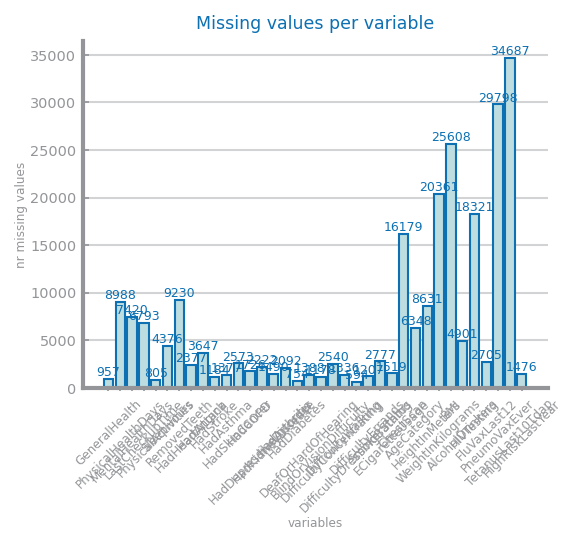

In [ ]:
from pandas import read_csv, DataFrame
from matplotlib.pyplot import figure, show
from dslabs_functions import plot_bar_chart
print(f"Dataset nr records={data.shape[0]}", f"nr variables={data.shape[1]}")

mv: dict[str, int] = {}
figure()
for var in data:
    nr: int = data[var].isna().sum()
    if nr > 0:
        mv[var] = nr


plot_bar_chart(
    list(mv.keys()),
    list(mv.values()),
    title="Missing values per variable",
    xlabel="variables",
    ylabel="nr missing values",
)
show()

Dropping Missing Values

dropping rows with any value as missing
(242484, 98)


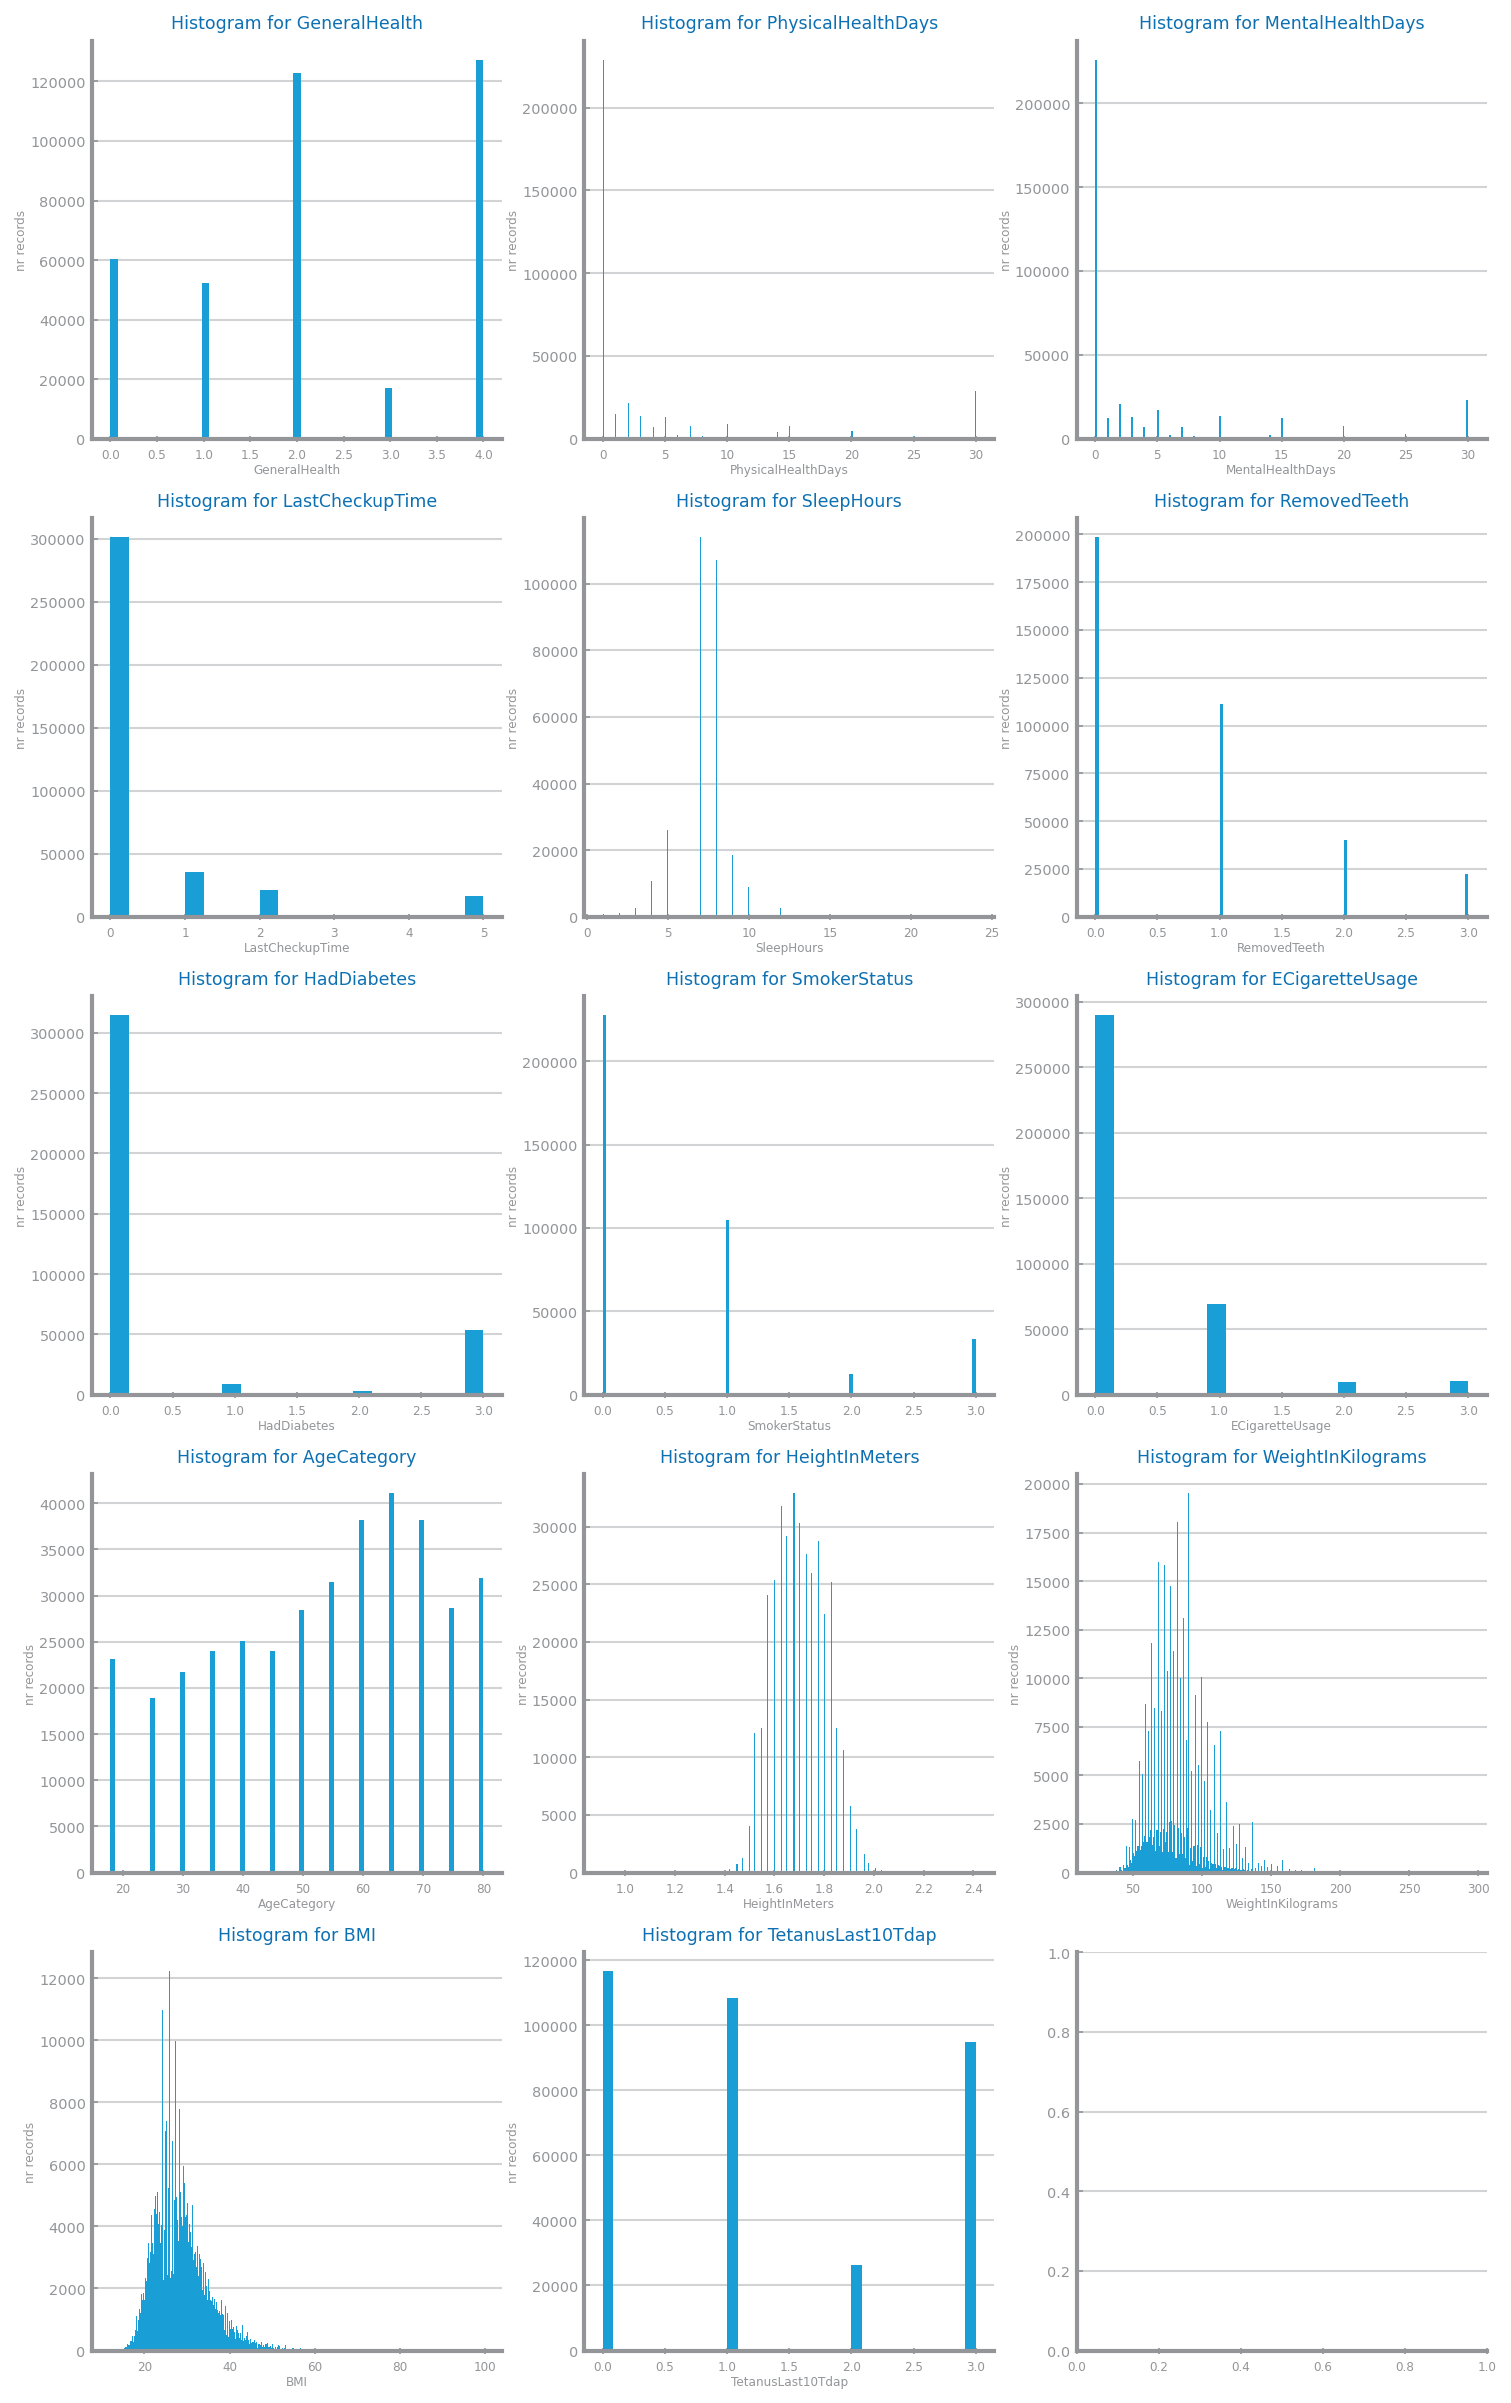

In [4]:
from numpy import ndarray
from pandas import DataFrame, read_csv
from matplotlib.pyplot import savefig, show, figure
from dslabs_functions import plot_multibar_chart, CLASS_EVAL_METRICS, run_NB, run_KNN


def evaluate_approach(
    train: DataFrame, test: DataFrame, target: str = "class", metric: str = "accuracy"
) -> dict[str, list]:
    trnY = train.pop(target).values
    trnX: ndarray = train.values
    tstY = test.pop(target).values
    tstX: ndarray = test.values
    eval: dict[str, list] = {}

    eval_NB: dict[str, float] = run_NB(trnX, trnY, tstX, tstY, metric=metric)
    eval_KNN: dict[str, float] = run_KNN(trnX, trnY, tstX, tstY, metric=metric)
    if eval_NB != {} and eval_KNN != {}:
        for met in CLASS_EVAL_METRICS:
            eval[met] = [eval_NB[met], eval_KNN[met]]
    return eval


print("dropping rows with any value as missing")
df: DataFrame = data.dropna(how="any", inplace=False)
print(df.shape)

from matplotlib.pyplot import savefig, show
from dslabs_functions import get_variable_types

variables_types: dict[str, list] = get_variable_types(data)
numeric: list[str] = variables_types["numeric"]


from dslabs_functions import set_chart_labels
from numpy import ndarray
from matplotlib.figure import Figure
from matplotlib.pyplot import savefig, show, subplots
from dslabs_functions import define_grid, HEIGHT


if [] != numeric:
    rows, cols = define_grid(len(numeric))
    fig, axs = subplots(
        rows, cols, figsize=(cols * HEIGHT, rows * HEIGHT), squeeze=False
    )
    i: int
    j: int
    i, j = 0, 0
    for n in range(len(numeric)):
        set_chart_labels(
            axs[i, j],
            title=f"Histogram for {numeric[n]}",
            xlabel=numeric[n],
            ylabel="nr records",
        )
        axs[i, j].hist(data[numeric[n]].dropna().values, "auto")
        i, j = (i + 1, 0) if (n + 1) % cols == 0 else (i, j + 1)
    savefig(f"images/{file_tag}_single_histograms_after_encoding.png")
    show()
else:
    print("There are no numeric variables.")



# target = "CovidPos"
# train = df.sample(frac=0.8, random_state=1)
# test = df.drop(train.index)
# figure()
# eval: dict[str, list] = evaluate_approach(train, test, target=target, metric="recall")
# plot_multibar_chart(
#     ["NB", "KNN"], eval, title=f"{file_tag} evaluation", percentage=True
# )
# savefig(f"images/{file_tag}_eval.png")
# show()


# print("dropping rows with all values as missing")
# df: DataFrame = data.dropna(how="all", inplace=False)
# print(df.shape)



# print("dropping columns with any value as missing")
# df: DataFrame = data.dropna(axis=1, how="any", inplace=False)
# print(df.shape)

# def mvi_by_dropping(
#     data: DataFrame, min_pct_per_var: float = 0.1, min_pct_per_rec: float = 0.0
# ) -> DataFrame:
#     # Deleting variables
#     df: DataFrame = data.dropna(
#         axis=1, thresh=data.shape[0] * min_pct_per_var, inplace=False
#     )
#     # Deleting records
#     df.dropna(axis=0, thresh=data.shape[1] * min_pct_per_rec, inplace=True)

#     return df

# print("dropping variables with more than 30% missing values")
# print("dropping records with more than 10% missing values")
# df: DataFrame = mvi_by_dropping(data, min_pct_per_var=0.7, min_pct_per_rec=0.9)
# print(df.shape)

Filling missing values

In [2]:
from numpy import ndarray
from pandas import DataFrame, read_csv
from matplotlib.pyplot import savefig, show, figure
from dslabs_functions import plot_multibar_chart, CLASS_EVAL_METRICS, run_NB, run_KNN


def evaluate_approach(
    train: DataFrame, test: DataFrame, target: str = "class", metric: str = "accuracy"
) -> dict[str, list]:
    trnY = train.pop(target).values
    trnX: ndarray = train.values
    tstY = test.pop(target).values
    tstX: ndarray = test.values
    eval: dict[str, list] = {}

    eval_NB: dict[str, float] = run_NB(trnX, trnY, tstX, tstY, metric=metric)
    eval_KNN: dict[str, float] = run_KNN(trnX, trnY, tstX, tstY, metric=metric)
    if eval_NB != {} and eval_KNN != {}:
        for met in CLASS_EVAL_METRICS:
            eval[met] = [eval_NB[met], eval_KNN[met]]
    return eval


from numpy import ndarray
from pandas import concat
from sklearn.impute import SimpleImputer, KNNImputer
from dslabs_functions import get_variable_types, mvi_by_filling


def mvi_by_filling(data: DataFrame, strategy: str = "frequent") -> DataFrame:
    df: DataFrame
    variables: dict = get_variable_types(data)
    stg_num, v_num = "mean", -1
    stg_sym, v_sym = "most_frequent", "NA"
    stg_bool, v_bool = "most_frequent", False
    if strategy != "knn":
        lst_dfs: list = []
        if strategy == "constant":
            stg_num, stg_sym, stg_bool = "constant", "constant", "constant"
        if len(variables["numeric"]) > 0:
            imp = SimpleImputer(strategy=stg_num, fill_value=v_num, copy=True)
            tmp_nr = DataFrame(
                imp.fit_transform(data[variables["numeric"]]),
                columns=variables["numeric"],
            )
            lst_dfs.append(tmp_nr)
        if len(variables["symbolic"]) > 0:
            imp = SimpleImputer(strategy=stg_sym, fill_value=v_sym, copy=True)
            tmp_sb = DataFrame(
                imp.fit_transform(data[variables["symbolic"]]),
                columns=variables["symbolic"],
            )
            lst_dfs.append(tmp_sb)
        if len(variables["binary"]) > 0:
            imp = SimpleImputer(strategy=stg_bool, fill_value=v_bool, copy=True)
            tmp_bool = DataFrame(
                imp.fit_transform(data[variables["binary"]]),
                columns=variables["binary"],
            )
            lst_dfs.append(tmp_bool)
        df = concat(lst_dfs, axis=1)
    else:
        imp = KNNImputer(n_neighbors=5)
        imp.fit(data)
        ar: ndarray = imp.transform(data)
        df = DataFrame(ar, columns=data.columns, index=data.index)
    return df

df: DataFrame = mvi_by_filling(data, strategy="frequent")
df.head(10)


# print("NB Approach")
# numeric_vars: list[str] = get_variable_types(data)["numeric"]
# df: DataFrame = mvi_by_filling(data[numeric_vars], strategy="frequent")
# print("MVI frequent strategy", df.describe())

# print(data.shape,  list(data.keys()))
# print(df.shape, list(df.keys()))

target = "CovidPos"
train = df.sample(frac=0.8, random_state=1)
test = df.drop(train.index)
figure()
eval: dict[str, list] = evaluate_approach(train, test, target=target, metric="recall")
plot_multibar_chart(
    ["NB", "KNN"], eval, title=f"{file_tag} evaluation", percentage=True
)
savefig(f"images/{file_tag}_eval.png")
show()

# print("KNN Approach")
# df: DataFrame = mvi_by_filling(data[numeric_vars], strategy="knn")
# print("MVI KNN strategy", df.describe())

: 

Outliers 

In [1]:
from pandas import read_csv, DataFrame, Series
from dslabs_functions import (
    NR_STDEV,
    get_variable_types,
    determine_outlier_thresholds_for_var,
)

file_tag = "class_pos_covid_encoded"
data: DataFrame = read_csv(
    "class_pos_covid_encoded.csv", na_values="", parse_dates=True, dayfirst=True
)
print(f"Original data: {data.shape}")

n_std: int = NR_STDEV
numeric_vars: list[str] = get_variable_types(data)["numeric"]
if numeric_vars is not None:
    df: DataFrame = data.copy(deep=True)
    summary5: DataFrame = data[numeric_vars].describe()
    for var in numeric_vars:
        top_threshold, bottom_threshold = determine_outlier_thresholds_for_var(
            summary5[var]
        )
        outliers: Series = df[(df[var] > top_threshold) | (df[var] < bottom_threshold)]
        df.drop(outliers.index, axis=0, inplace=True)
    df.to_csv(f"data/{file_tag}_drop_outliers.csv", index=True)
    print(f"Data after dropping outliers: {df.shape}")
else:
    print("There are no numeric variables")


Original data: (380932, 98)
Data after dropping outliers: (214392, 98)


In [2]:
if [] != numeric_vars:
    df: DataFrame = data.copy(deep=True)
    for var in numeric_vars:
        top, bottom = determine_outlier_thresholds_for_var(summary5[var])
        median: float = df[var].median()
        df[var] = df[var].apply(lambda x: median if x > top or x < bottom else x)
    df.to_csv(f"data/{file_tag}_replacing_outliers.csv", index=True)
    print("Data after replacing outliers:", df.shape)
    print(df.describe())
else:
    print("There are no numeric variables")


Data after replacing outliers: (380932, 98)
                 Sex  GeneralHealth  PhysicalHealthDays  MentalHealthDays  \
count  380932.000000  379975.000000       371944.000000     373512.000000   
mean        0.471037       2.259696            1.820500          2.239269   
std         0.499161       1.446004            4.042989          4.591963   
min         0.000000       0.000000            0.000000          0.000000   
25%         0.000000       1.000000            0.000000          0.000000   
50%         0.000000       2.000000            0.000000          0.000000   
75%         1.000000       4.000000            2.000000          2.000000   
max         1.000000       4.000000           21.000000         21.000000   

       LastCheckupTime  PhysicalActivities     SleepHours   RemovedTeeth  \
count    374139.000000       380127.000000  376556.000000  371702.000000   
mean          0.208348            0.758907       7.097741       0.943441   
std           0.527571            

In [3]:
if [] != numeric_vars:
    df: DataFrame = data.copy(deep=True)
    for var in numeric_vars:
        top, bottom = determine_outlier_thresholds_for_var(summary5[var])
        df[var] = df[var].apply(
            lambda x: top if x > top else bottom if x < bottom else x
        )
    df.to_csv(f"data/{file_tag}_truncate_outliers.csv", index=True)
    print("Data after truncating outliers:", df.shape)
    print(df.describe())
else:
    print("There are no numeric variables")


Data after truncating outliers: (380932, 98)
                 Sex  GeneralHealth  PhysicalHealthDays  MentalHealthDays  \
count  380932.000000  379975.000000       371944.000000     373512.000000   
mean        0.471037       2.259696            3.717290          3.814732   
std         0.499161       1.446004            6.879175          6.707145   
min         0.000000       0.000000            0.000000          0.000000   
25%         0.000000       1.000000            0.000000          0.000000   
50%         0.000000       2.000000            0.000000          0.000000   
75%         1.000000       4.000000            3.000000          5.000000   
max         1.000000       4.000000           21.869174         21.223905   

       LastCheckupTime  PhysicalActivities     SleepHours   RemovedTeeth  \
count    374139.000000       380127.000000  376556.000000  371702.000000   
mean          0.323660            0.758907       7.010490       1.645650   
std           0.722447           